In [1]:
import matplotlib.pyplot as plt
import numpy as np
from numpy import genfromtxt
import scipy
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split


In [2]:
music_data = genfromtxt('year-prediction-msd-train.txt', delimiter=',')

In [7]:
# Split year values from the array
music_y = music_data[:, 0]

# Split the first timbre average as feature
music_x = music_data[:, np.newaxis, 1]

In [11]:
# Split the data using train_test_split (training data and validation, considering we already have a testing set)
music_x_train, music_x_val, music_y_train, music_y_val =  train_test_split(music_x, music_y, test_size=0.05, random_state=0)

music_x_train.shape, music_x_val.shape, music_y_train.shape, music_y_val.shape

((440529, 1), (23186, 1), (440529,), (23186,))

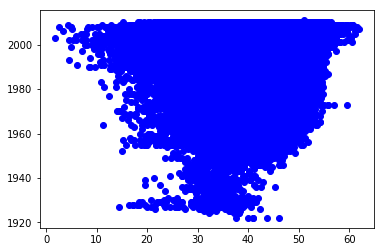

In [12]:
plt.scatter(music_x_train, music_y_train,  color='blue')
plt.show()

In [21]:
'''
# Create linear regression object
regr = linear_model.LinearRegression()
# Train the model using the training sets
regr.fit(music_x_train, music_y_train)
# Make predictions using the testing set
music_y_pred_val = regr.predict(music_x_val)

music_y_pred_train = regr.predict(music_x_train)
'''


def linearRegression (data_x, data_y, learning_rate, precision):
    lr = learning_rate
    n = data_x.shape[1]
    m = data_x.shape[0]

    intercept = 0
    coeff = np.zeros(n)
    iterations = 0
    
    while True:
        stop = True
        temp = np.zeros(n)

        error = (np.sum(data_x * coeff, axis=1) + intercept - data_y)
        temp_i = intercept - lr * (1/m) * np.sum(error)
        
        for i in range(n):
            temp[i] = coeff[i] - lr * (1/m) * np.sum(error * data_x[:,i])
            
        diff = temp - coeff
        diff [diff > precision] = True
        if temp_i - intercept > precision or diff.shape[0] < n:
            stop = False
            
        intercept = temp_i
        coeff = temp
        iterations += 1
        
        if stop:
            break
        
    return intercept, coeff, iterations
intercept, coeff, iterations = linearRegression(music_x_train, music_y_train, 1.0e-4,1.0e-5)

KeyboardInterrupt: 

In [14]:
# The coefficients
print('Estimated intercept: ', regr.intercept_)

# The coefficients
print('Coefficients: ', regr.coef_)

# The mean squared error
print("Mean squared error: %.2f"
      % mean_squared_error(music_y_val, music_y_pred_val))

print("Mean squared error: %.2f"
      % mean_squared_error(music_y_train, music_y_pred_train))

Estimated intercept:  1980.62515691
Coefficients:  [ 0.40947068]
Mean squared error: 113.85
Mean squared error: 113.48


In [ ]:
plt.scatter(music_x_train, music_y_train,  color='pink')
plt.scatter(music_x_val, music_y_val,  color='blue')
plt.plot(regr.co, color='black', linewidth=3)

plt.show()